In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as r
import math
get_ipython().magic('matplotlib notebook')
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D


<IPython.core.display.Javascript object>


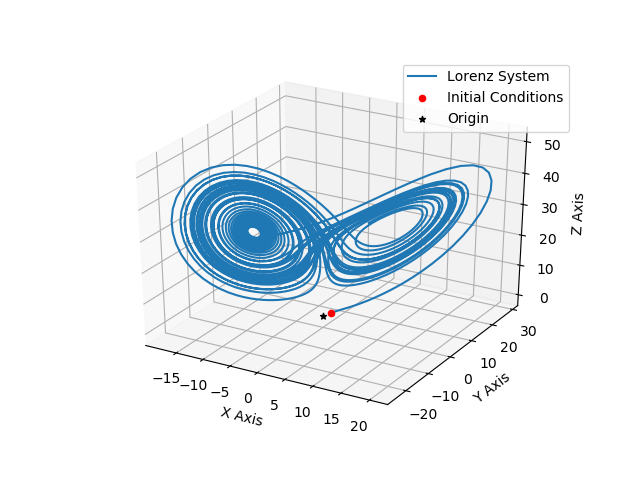

29.55136606699132


In [23]:
#Monte Carlo for a Maxwell-Boltzmann Distribution
a = 1
N = 2000

def maxwell(ro):
    u = math.erf(ro / (np.sqrt(2)*a))
    v = np.sqrt(2/np.pi)
    w = ro/a
    z = np.e**(-ro**2/ (2*(a**2)))
    return u - (v*w*z)

#Simplified model of convective processes in Earth's Atmosphere based on Lorenz Equations:
#Case 1 (conduction):  r0 = maxwell(r.random())*9
#Case 2 (moving towards convection): r0 = maxwell(r.random())*9 + 20
#Case 3 (convection - chaotic): r0 = maxwell(r.random())*11 + 29
r0 = maxwell(r.random())*11 + 29
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # unpack the state vector
    return sigma * (y - x), x * (r0 - z) - y, x * y - beta * z  # derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)
#Plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2], label='Lorenz System')

ax.scatter(1, 1, 1, color='r', marker='o', label='Initial Conditions')
ax.scatter(0, 0, 0, color='k', marker='*', label='Origin')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.legend()
plt.show()
print(r0)